 Removing outliers using two method: Z-score
 and IQR methods

In [ ]:
"""
OBJECTIVE
To identify and remove outliers from a given dataset using two statistical methods:
    Z-score method
    Interquartile Range (IQR) method
"""

In [ ]:
"""
PROBLEM STATEMENT
Outliers can significantly affect the mean, variance, and predictions of models.
The problem in this experiment is:

How can we detect and remove extreme values in numerical data using statistical approaches?

How do Z-score and IQR methods compare in identifying these outliers?

"""

In [ ]:
"""
DATASET USED AND DESCRIPTION
The dataset is manually hardcoded (no external dataset).

Example data:
                [10, 12, 13, 15, 20, 28, 29, 102, 90]

This list contains mostly small values but two significantly large numbers (102, 90) which are potential outliers.
"""

In [ ]:
"""
METHODS USED
Z-score Method:
Formula:
        z = (x - mean) / std deviation

Outliers are values with absolute Z-score > threshold (here, threshold = 1).

IQR Method:
Compute Q1 (25th percentile) and Q3 (75th percentile).

Interquartile Range (IQR) = Q3 - Q1

Outlier cutoff:

Lower bound: Q1 - 1.5 x IQR

Upper bound: Q3 + 1.5 x IQR

Values outside this range are considered outliers.
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7c6fd2f5f490>,
 'caps': [<matplotlib.lines.Line2D at 0x7c6fd2f64b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c6fd2f5ea90>],
 'medians': [<matplotlib.lines.Line2D at 0x7c6fd2f66110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c6fd2f66ad0>],
 'means': []}

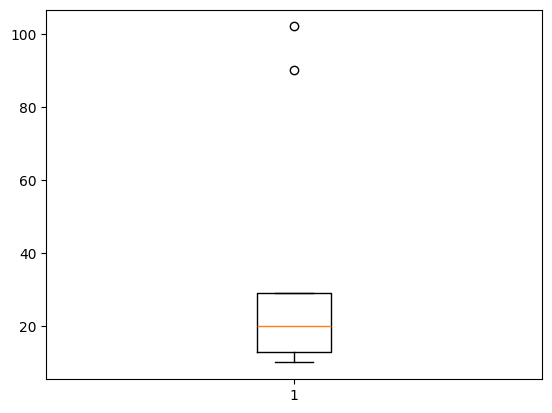

In [2]:
data = [10, 12, 13, 15, 20, 28, 29, 102, 90]
plt.boxplot(data)

In [3]:
out = []
threshold = 1
mean = np.mean(data)
sd = np.std(data)

In [5]:
for i in data:
    z = (i - mean)/sd
    print(f"Element {i} : {z}")

    if np.abs(z) > threshold:
        out.append(i)

print(out)

Element 10 : -0.7687247717308493
Element 12 : -0.7083009905467651
Element 13 : -0.678089099954723
Element 15 : -0.6176653187706388
Element 20 : -0.4666058658104282
Element 28 : -0.22491074107409126
Element 29 : -0.19469885048204913
Element 102 : 2.0107691627370254
Element 90 : 1.6482264756325198
[102, 90, 102, 90]


In [6]:
sort = sorted(data)
q1, q3 = np.percentile(sort, [25, 75])
print(q1, q3)
inter = q3 - q1
print(inter)
upper = q3 + (1.5 * inter)
lower = q1 - (1.5 * inter)
print(upper, lower)

13.0 29.0
16.0
53.0 -11.0


In [7]:
remove = []

for i in sort:
    if ((i > upper) | (i < lower)):
        remove.append(i)

print(remove)

[90, 102]


In [ ]:
"""
RESULTS
Z-score Method

Outliers detected: **[102, 90,cate counts because the loop checks each occurrence without removing duplicates).

IQR Method

Q1 = 13.0, Q3 = 29.0, IQR = 16.0

Upper bound = 53.0, Lower bound = -11.0

Outliers detected: ****
"""

In [ ]:
"""
CONCLUSION
Both methods successfully identified 90 and 102 as outliers in the dataset.

Z-score method is sensitive to the spread (standard deviation) and flagged them twice due to the way the detection loop is written.

IQR method is more robust to skewed data since it uses percentile spread and not affected by extreme values as much as Z-score.

In practice, choice depends on the data distribution:

Use Z-score for normally distributed data.

Use IQR for skewed or non-parametric data
"""